# Enhancer WSTARR

**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../config/config_sing.R")))
show_env()

You are in Singularity: singularity_proj_combeffect 
BASE DIRECTORY:     /data/reddylab/Kuei 
WORK DIRECTORY:     /data/reddylab/Kuei/out 
CODE DIRECTORY:     /data/reddylab/Kuei/code 
PATH OF SOURCE:     /data/reddylab/Kuei/source 
PATH OF EXECUTABLE: /data/reddylab/Kuei/bin 
PATH OF ANNOTATION: /data/reddylab/Kuei/annotation 
PATH OF PROJECT:    /data/reddylab/Kuei/code/Proj_CombEffect_ENCODE_FCC 
PATH OF RESULTS:    /data/reddylab/Kuei/out/proj_combeffect_encode_fcc 


In [2]:
fdiry = file.path(FD_RES, "region", "KS91_K562_ASTARRseq_peak_macs")
print(dir(fdiry))

 [1] "KS91_K562_hg38_ASTARRseq_Input.all_reps.masked.union_narrowPeak.q5.bed"                              
 [2] "KS91_K562_hg38_ASTARRseq_Input.all_reps.masked.union_narrowPeak.q5.ccre_all.bed.gz"                  
 [3] "KS91_K562_hg38_ASTARRseq_Input.all_reps.masked.union_narrowPeak.q5.enhancer_junke_peak_astarr.bed.gz"
 [4] "KS91_K562_hg38_ASTARRseq_Input.all_reps.masked.union_narrowPeak.q5.enhancer_junke_peak_wstarr.bed.gz"
 [5] "KS91_K562_hg38_ASTARRseq_Input.all_reps.masked.union_narrowPeak.q5.gencode_v24_tss.bed.gz"           
 [6] "KS91_K562_hg38_ASTARRseq_Input.all_reps.masked.union_narrowPeak.q5.nuc.bed.gz"                       
 [7] "KS91_K562_hg38_ASTARRseq_Input.all_reps.masked.union_narrowPeak.q5.remap2022_nr.bed.gz"              
 [8] "KS91_K562_hg38_ASTARRseq_Input.ccre_all.freq.tsv"                                                    
 [9] "KS91_K562_hg38_ASTARRseq_Input.count.ccre_all.tsv"                                                   
[10] "KS91_K562_hg38_ASTARRs

In [4]:
### set file path
fdiry = file.path(FD_RES, "region", "KS91_K562_ASTARRseq_peak_macs")
fname = "KS91_K562_hg38_ASTARRseq_Input.all_reps.masked.union_narrowPeak.q5.enhancer_junke_peak_wstarr.bed.gz"
fpath = file.path(fdiry, fname)


### import data
cnames = c("Chrom", "Start", "End",
           "Chrom_Enhancer", "Start_Enhancer", "End_Enhancer",
           "Overlap")
dat = read_tsv(fpath, col_names = cnames, show_col_types = FALSE)
dat = dat %>% mutate(
    Peak     = paste(Chrom, Start, End, sep="_"),
    Enhancer = paste(Chrom_Enhancer, Start_Enhancer, End_Enhancer, sep="_"),
)

### assign
dat_peak_annot_enhancer_wstarr = dat
print(dim(dat))
head(dat)

[1] 38216     9


Chrom,Start,End,Chrom_Enhancer,Start_Enhancer,End_Enhancer,Overlap,Peak,Enhancer
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
chr1,777949,779437,chr1,778410,778450,40,chr1_777949_779437,chr1_778410_778450
chr1,777949,779437,chr1,778460,778820,360,chr1_777949_779437,chr1_778460_778820
chr1,777949,779437,chr1,778830,778860,30,chr1_777949_779437,chr1_778830_778860
chr1,777949,779437,chr1,778870,779090,220,chr1_777949_779437,chr1_778870_779090
chr1,818602,819380,chr1,818900,818920,20,chr1_818602_819380,chr1_818900_818920
chr1,818602,819380,chr1,818940,818960,20,chr1_818602_819380,chr1_818940_818960


In [5]:
###
dat = dat_peak_annot_enhancer_wstarr
dat = dat %>% 
    group_by(Peak) %>% 
    summarize(
        Name = "Enhancer_WSTARR",
        Count = n(), 
        Annotate = paste(Enhancer, collapse = ","),
        .groups="drop")

###
dat_peak_count_enhancer_wstarr = dat
print(dim(dat))
head(dat)

[1] 20688     4


Peak,Name,Count,Annotate
<chr>,<chr>,<int>,<chr>
chr1_100036871_100039191,Enhancer_WSTARR,3,"chr1_100037860_100037890,chr1_100038040_100038330,chr1_100038340_100038360"
chr1_100132370_100133575,Enhancer_WSTARR,2,"chr1_100132760_100132980,chr1_100133020_100133340"
chr1_100265529_100267006,Enhancer_WSTARR,2,"chr1_100266060_100266090,chr1_100266100_100266240"
chr1_10032426_10033768,Enhancer_WSTARR,2,"chr1_10032730_10033020,chr1_10033200_10033250"
chr1_1006485_1006802,Enhancer_WSTARR,1,chr1_1006380_1006740
chr1_100682254_100682739,Enhancer_WSTARR,2,"chr1_100682420_100682440,chr1_100682460_100682480"


In [7]:
fdiry = file.path(FD_RES, "region", "KS91_K562_ASTARRseq_peak_macs")
fname = "KS91_K562_hg38_ASTARRseq_Input.count.enhancer_junke_peak_wstarr.tsv"
fpath = file.path(fdiry, fname)

write_tsv(dat_peak_count_enhancer_wstarr, fpath)

In [9]:
### set file path
fdiry = file.path(FD_RES, "region", "KS91_K562_ASTARRseq_peak_macs")
fname = "KS91_K562_hg38_ASTARRseq_Input.all_reps.masked.union_narrowPeak.q5.enhancer_junke_peak_astarr.bed.gz"
fpath = file.path(fdiry, fname)


### import data
cnames = c("Chrom", "Start", "End",
           "Chrom_Enhancer", "Start_Enhancer", "End_Enhancer",
           "Overlap")
dat = read_tsv(fpath, col_names = cnames, show_col_types = FALSE)
dat = dat %>% mutate(
    Peak     = paste(Chrom, Start, End, sep="_"),
    Enhancer = paste(Chrom_Enhancer, Start_Enhancer, End_Enhancer, sep="_"),
)

### assign
dat_peak_annot_enhancer_astarr = dat
print(dim(dat))
head(dat)

[1] 30725     9


Chrom,Start,End,Chrom_Enhancer,Start_Enhancer,End_Enhancer,Overlap,Peak,Enhancer
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
chr1,115411,115986,chr1,115570,115690,120,chr1_115411_115986,chr1_115570_115690
chr1,605090,605823,chr1,605280,605300,20,chr1_605090_605823,chr1_605280_605300
chr1,605090,605823,chr1,605330,605340,10,chr1_605090_605823,chr1_605330_605340
chr1,605090,605823,chr1,605350,605370,20,chr1_605090_605823,chr1_605350_605370
chr1,605090,605823,chr1,605440,605480,40,chr1_605090_605823,chr1_605440_605480
chr1,777949,779437,chr1,778380,778500,120,chr1_777949_779437,chr1_778380_778500


In [5]:
### set file path
fdiry = file.path(FD_RES, "region", "KS91_K562_ASTARRseq_peak_macs")
fname = "KS91_K562_hg38_ASTARRseq_Input.all_reps.masked.union_narrowPeak.q5.enhancer_junke_peak_wstarr.bed.gz"
fpath = file.path(fdiry, fname)


### import data
cnames = c("Chrom", "Start", "End",
           "Chrom_Enhancer", "Start_Enhancer", "End_Enhancer",
           "Overlap")
dat = read_tsv(fpath, col_names = cnames, show_col_types = FALSE)
dat = dat %>% mutate(Peak = paste(Chrom, Start, End, sep="_"))

### assign
dat_peak_annot_enhancer_wstarr = dat
print(dim(dat))
head(dat)

[1] 38216     8


Chrom,Start,End,Chrom_Enhancer,Start_Enhancer,End_Enhancer,Overlap,Peak
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
chr1,777949,779437,chr1,778410,778450,40,chr1_777949_779437
chr1,777949,779437,chr1,778460,778820,360,chr1_777949_779437
chr1,777949,779437,chr1,778830,778860,30,chr1_777949_779437
chr1,777949,779437,chr1,778870,779090,220,chr1_777949_779437
chr1,818602,819380,chr1,818900,818920,20,chr1_818602_819380
chr1,818602,819380,chr1,818940,818960,20,chr1_818602_819380


In [6]:
dat = dat_peak_annot_enhancer_astarr
dat = dat %>% dplyr::select(Chrom, Start, End, Peak) %>% distinct
dim(dat)

[1] 17120     4

In [7]:
dat = dat_peak_annot_enhancer_astarr
dat = dat %>% dplyr::select(Chrom_Enhancer, Start_Enhancer, End_Enhancer) %>% distinct
dim(dat)

[1] 30725     3

In [15]:
###
dat = dat_peak_annot_enhancer_astarr
dat = dat %>% 
    group_by(Peak) %>% 
    summarize(Count = n(), .groups="drop")

###
dat_peak_count_enhancer_astarr = dat
print(dim(dat))
head(dat)

[1] 17120     2


Peak,Count
<chr>,<int>
chr1_100036871_100039191,5
chr1_100132370_100133575,2
chr1_100248889_100250320,1
chr1_100265529_100267006,1
chr1_100347294_100347528,3
chr1_100362724_100363401,2


In [14]:
###
dat = dat_peak_annot_enhancer_wstarr
dat = dat %>% 
    group_by(Peak) %>% 
    summarize(Count = n(), .groups="drop")

###
dat_peak_count_enhancer_wstarr = dat
print(dim(dat))
head(dat)

[1] 20688     2


Peak,Count
<chr>,<int>
chr1_100036871_100039191,3
chr1_100132370_100133575,2
chr1_100265529_100267006,2
chr1_10032426_10033768,2
chr1_1006485_1006802,1
chr1_100682254_100682739,2


In [17]:
ASSAY  = "Tewhey_K562_TileMPRA"
FOLDER = "coverage_astarrseq_peak_macs_input"

### set file path
fdiry = file.path(FD_RES, "results", ASSAY, FOLDER, "summary")
fname = "peak_regions.tsv"
fpath = file.path(fdiry, fname)

### import data
dat_region = read_tsv(fpath, show_col_types = FALSE)
peaks = dat_region$Peak

print(dim(dat_region))
head(dat_region)

[1] 417   5


Chrom,Start,End,Peak,Region
<chr>,<dbl>,<dbl>,<chr>,<chr>
chr8,126778902,126779728,chr8_126778902_126779728,MYC
chr8,126782925,126783318,chr8_126782925_126783318,MYC
chr8,126804776,126805825,chr8_126804776_126805825,MYC
chr8,126817018,126817490,chr8_126817018_126817490,MYC
chr8,126820465,126821393,chr8_126820465_126821393,MYC
chr8,126824093,126824987,chr8_126824093_126824987,MYC


In [ ]:
dat = dat_peak_freq_tss %>% 
    dplyr::filter(Peak %in% peaks) %>%
    dplyr::select(Peak) %>%
    dplyr::mutate(Label = 1)

dat = left_join(dat_region, dat, by = "Peak")
dat = replace(dat, is.na(dat), 0)
dat$Name = "TSS"

dat_peak_label_tss = dat
print(dim(dat))
head(dat)

In [21]:
dat1 = dat_peak_count_enhancer_astarr %>% 
    dplyr::filter(Peak %in% peaks) %>%
    dplyr::select(Peak) %>%
    dplyr::mutate(Name = "Enhancer_ASTARR",Label = 1)

dat2 = dat_peak_count_enhancer_wstarr %>% 
    dplyr::filter(Peak %in% peaks) %>%
    dplyr::select(Peak) %>%
    dplyr::mutate(Name = "Enhancer_WSTARR",Label = 1)


dat = bind_rows(dat1, dat2) %>% spread(Name, Label)
dat = left_join(dat_region, dat, by = "Peak")
dat = replace(dat, is.na(dat), 0)

dat_peak_label_regulate = dat
print(dim(dat))
head(dat)

[1] 417   7


Chrom,Start,End,Peak,Region,Enhancer_ASTARR,Enhancer_WSTARR
<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
chr8,126778902,126779728,chr8_126778902_126779728,MYC,0,0
chr8,126782925,126783318,chr8_126782925_126783318,MYC,0,0
chr8,126804776,126805825,chr8_126804776_126805825,MYC,0,0
chr8,126817018,126817490,chr8_126817018_126817490,MYC,0,0
chr8,126820465,126821393,chr8_126820465_126821393,MYC,0,0
chr8,126824093,126824987,chr8_126824093_126824987,MYC,0,0


In [22]:
dat = dat_peak_label_regulate
dat = dat %>% 
    gather(Name, Label, -Chrom, -Start, -End, -Peak, -Region) %>%
    mutate(Label = as.character(Label))
head(dat)

Chrom,Start,End,Peak,Region,Name,Label
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
chr8,126778902,126779728,chr8_126778902_126779728,MYC,Enhancer_ASTARR,0
chr8,126782925,126783318,chr8_126782925_126783318,MYC,Enhancer_ASTARR,0
chr8,126804776,126805825,chr8_126804776_126805825,MYC,Enhancer_ASTARR,0
chr8,126817018,126817490,chr8_126817018_126817490,MYC,Enhancer_ASTARR,0
chr8,126820465,126821393,chr8_126820465_126821393,MYC,Enhancer_ASTARR,0
chr8,126824093,126824987,chr8_126824093_126824987,MYC,Enhancer_ASTARR,0


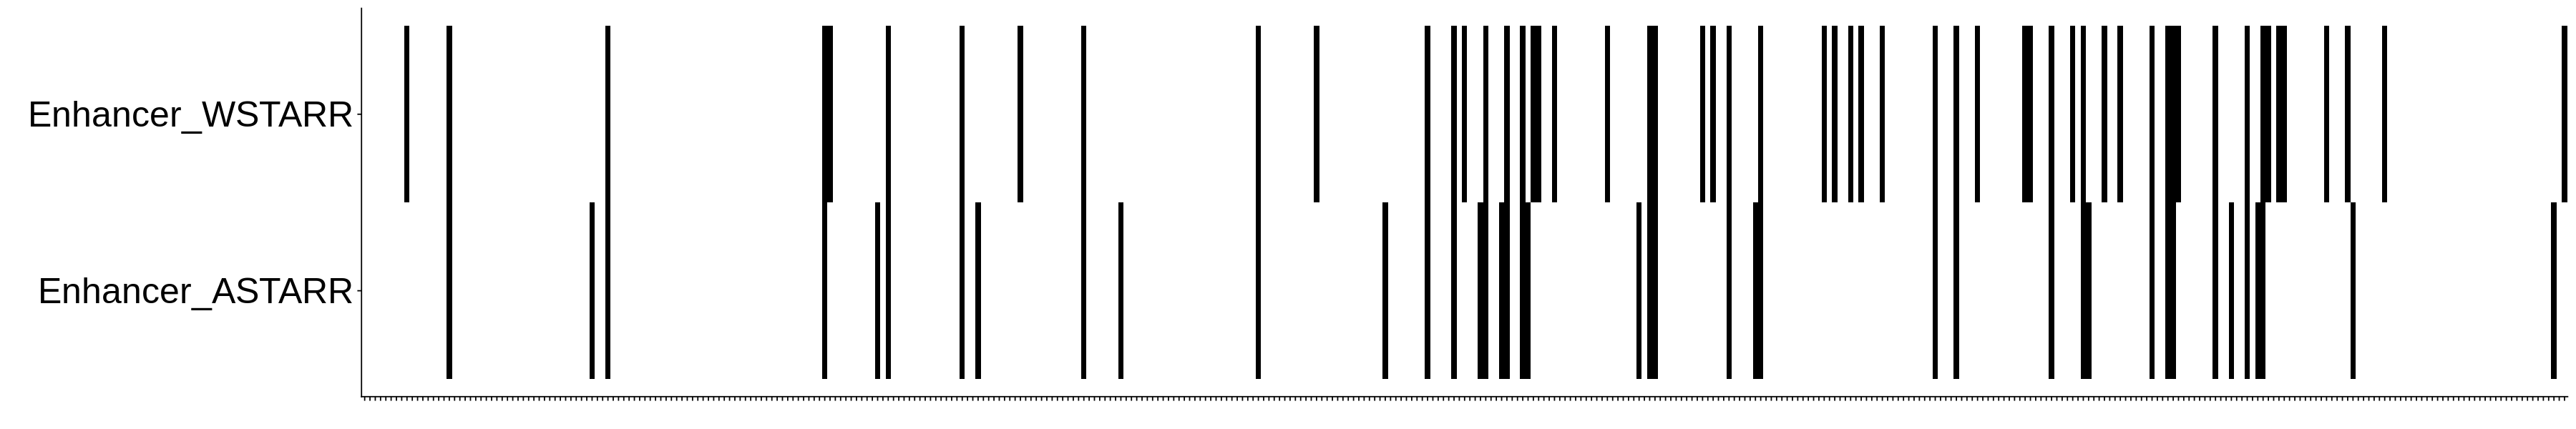

In [24]:
gpt = ggplot(dat, aes(x=Peak, y=Name, fill=Label)) +
    geom_tile() +
    scale_fill_manual(values = c("1" = "black", "0" = "white")) +
    labs(x="", y="") +
    theme_cowplot() +
    theme(axis.text.x = element_blank(),
          axis.text.y = element_text(size=30),
          legend.position = "none")
    

options(repr.plot.height=5, repr.plot.width=30)
print(gpt)